# Earnings Regression — Repro Notebook

This notebook reproduces the analysis performed by `scripts/run_earnings_analysis.py`. It loads `Data/earnings_regression_panel.csv`, computes mean Surprise and CAR by regime, creates the same figures, fits the same OLS model, and saves outputs under `Data/`. Each code cell includes a short explanation of the step.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from IPython.display import Image, display
sns.set(style='whitegrid')
%matplotlib inline

## Load prepared panel
The panel was produced by the preparation notebook and saved to `Data/earnings_regression_panel.csv`.

In [2]:
panel = pd.read_csv('Data/earnings_regression_panel.csv', parse_dates=['Earnings Date'])
print('panel shape:', panel.shape)
panel.head()

panel shape: (248, 7)


,Ticker,Earnings Date,Surprise,CAR,Regime,VIX,Δ10Y
0,GOOGL,2005-04-21,0.0095,0.000635,0,14.41,0.035971
1,NVDA,2005-05-12,0.0040,0.026393,0,16.12,0.027027
2,AAPL,2005-07-13,0.0000,0.001773,0,10.84,-0.047945
3,GOOGL,2005-07-21,0.0035,0.006394,0,10.97,-0.009259
4,NVDA,2005-08-11,0.0000,0.002138,0,12.42,0.033493


## Cleaning and type coercion
Coerce numeric columns, rename `Δ10Y` to `D10Y` for convenience, and drop rows missing `Surprise` or `CAR`.

In [3]:
df = panel.copy()
if 'Δ10Y' in df.columns:
    df = df.rename(columns={'Δ10Y':'D10Y'})
for c in ['Surprise','CAR','VIX','D10Y']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
df = df.dropna(subset=['Surprise','CAR'])
print('cleaned shape:', df.shape)
df.head()

cleaned shape: (248, 7)


,Ticker,Earnings Date,Surprise,CAR,Regime,VIX,D10Y
0,GOOGL,2005-04-21,0.0095,0.000635,0,14.41,0.035971
1,NVDA,2005-05-12,0.0040,0.026393,0,16.12,0.027027
2,AAPL,2005-07-13,0.0000,0.001773,0,10.84,-0.047945
3,GOOGL,2005-07-21,0.0035,0.006394,0,10.97,-0.009259
4,NVDA,2005-08-11,0.0000,0.002138,0,12.42,0.033493


## Means by Regime
Compute mean Surprise and CAR by `Regime` (if present) and save results.

In [5]:
if 'Regime' in df.columns:
    means = df.groupby('Regime')[['Surprise','CAR']].mean().reset_index()
    print('Means by Regime:\n', means)  # Fixed the string by using \n instead of a literal line break
    means.to_csv('Data/means_by_regime.csv', index=False)
else:
    print('No Regime column found')

Means by Regime:
    Regime  Surprise       CAR
0       0  0.032896  0.002641
1       1  0.007250 -0.000911
2       2  0.054710 -0.001356


## Visualisations
Create boxplots of Surprise and CAR by regime and a scatter Surprise vs CAR; display them inline and save to `Data/`.

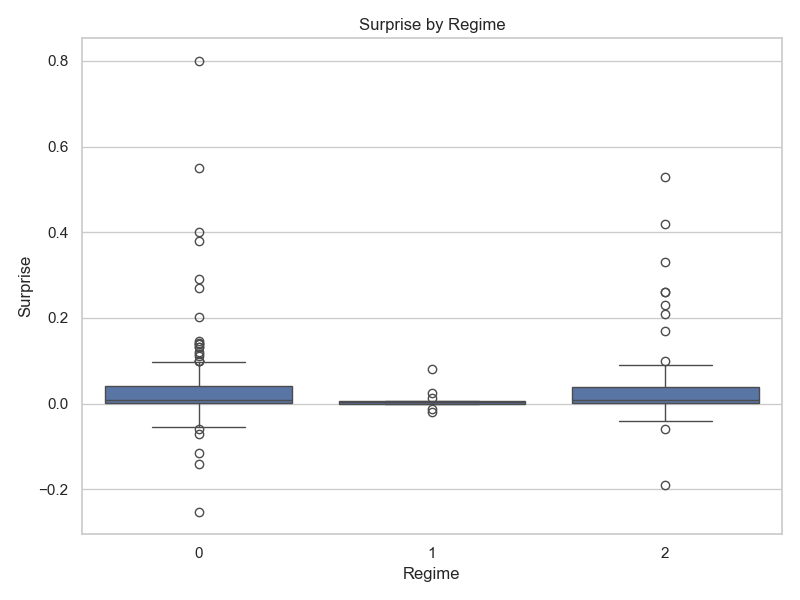

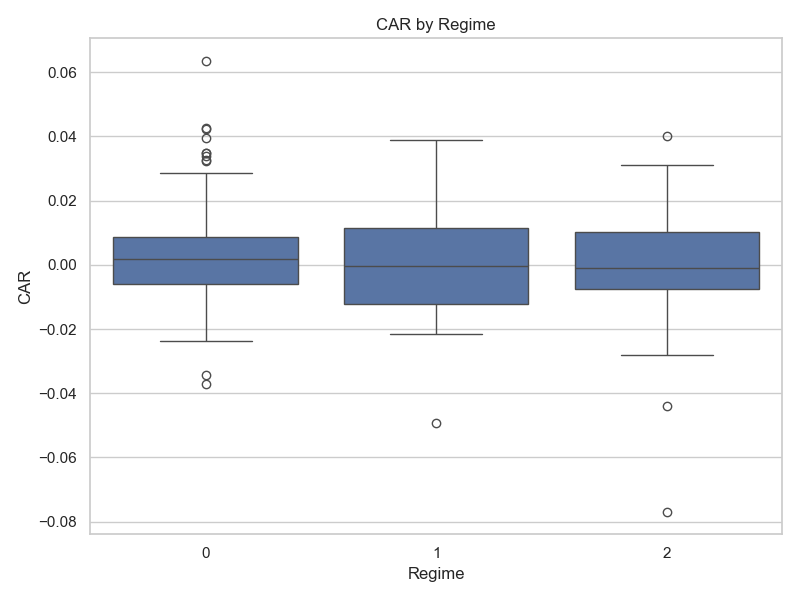

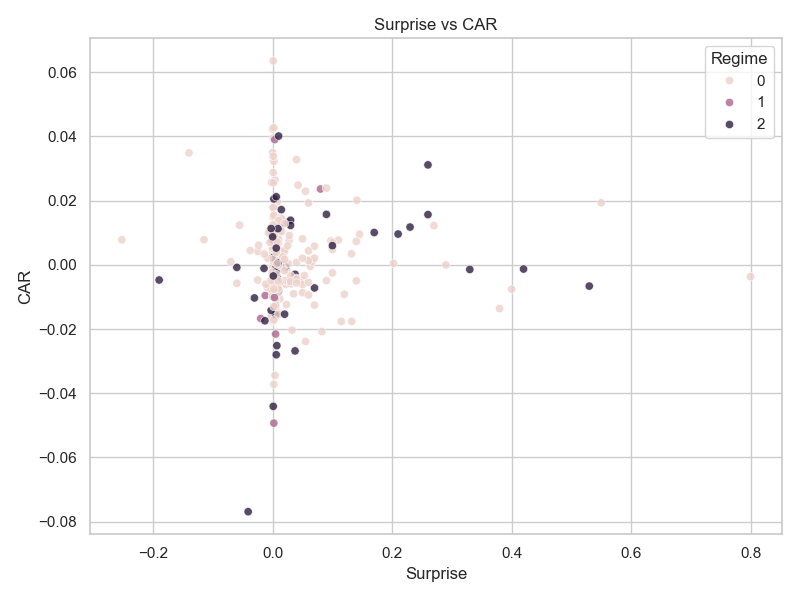

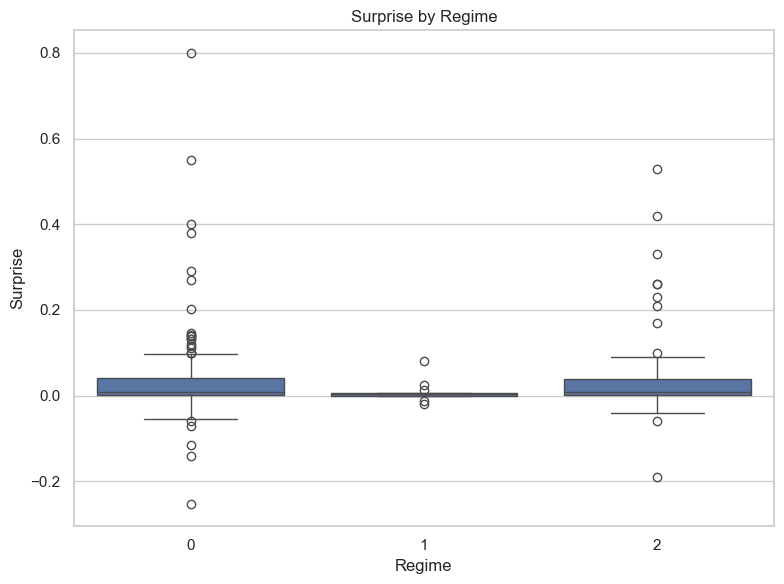

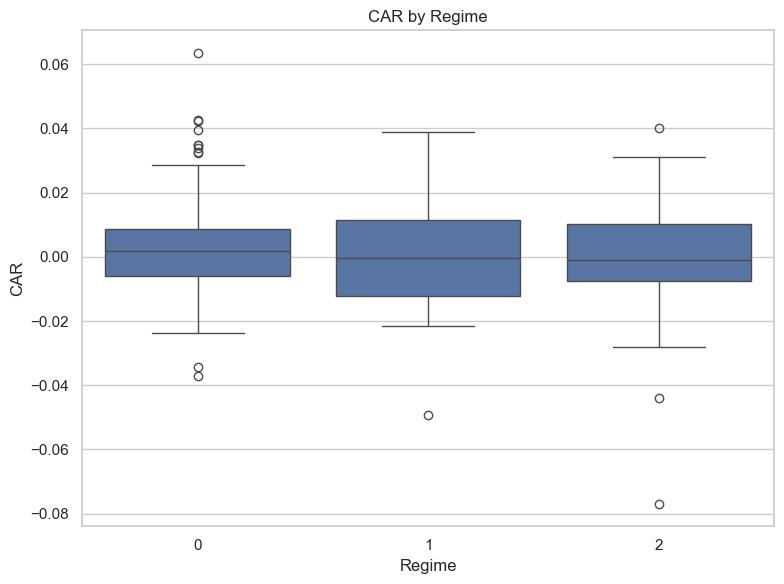

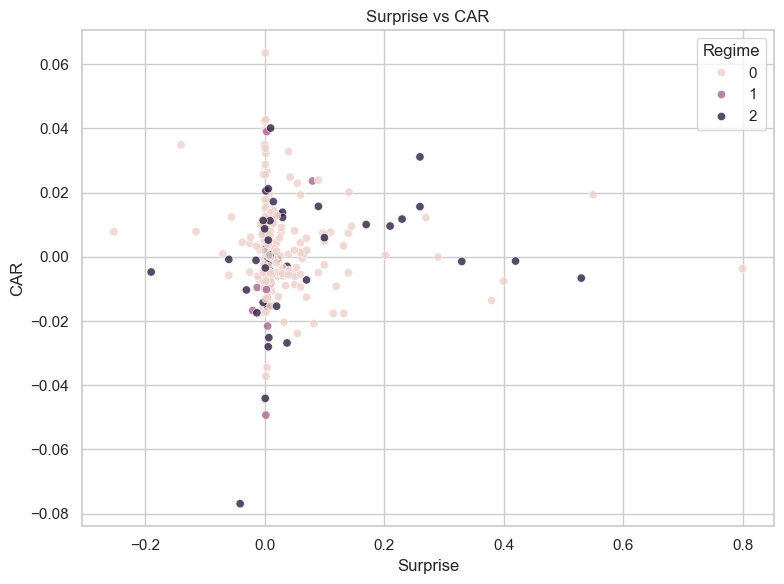

In [6]:
# Boxplots saved as PNGs
if 'Regime' in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Regime', y='Surprise', data=df)
    plt.title('Surprise by Regime')
    plt.tight_layout()
    plt.savefig('Data/fig_surprise_box.png')
    display(Image('Data/fig_surprise_box.png'))
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Regime', y='CAR', data=df)
    plt.title('CAR by Regime')
    plt.tight_layout()
    plt.savefig('Data/fig_car_box.png')
    display(Image('Data/fig_car_box.png'))
else:
    print('No Regime column available for boxplots')
# Scatter Surprise vs CAR
plt.figure(figsize=(8,6))
if 'Regime' in df.columns:
    sns.scatterplot(x='Surprise', y='CAR', hue='Regime', data=df, alpha=0.8)
else:
    sns.scatterplot(x='Surprise', y='CAR', data=df, alpha=0.8)
plt.title('Surprise vs CAR')
plt.tight_layout()
plt.savefig('Data/fig_scatter.png')
display(Image('Data/fig_scatter.png'))

## Regression
Fit the same model used in the script: `CAR ~ Surprise + C(Regime) + VIX + D10Y` (terms are included only if the columns exist). Save the summary to `Data/regression_summary.txt`.

In [7]:
terms = ['Surprise']
if 'Regime' in df.columns:
    terms.append('C(Regime)')
if 'VIX' in df.columns:
    terms.append('VIX')
if 'D10Y' in df.columns:
    terms.append('D10Y')
formula = 'CAR ~ ' + ' + '.join(terms)
print('Formula:', formula)
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())
with open('Data/regression_summary.txt', 'w') as f:
    f.write(str(model.summary()))
print('Saved Data/regression_summary.txt')

Formula: CAR ~ Surprise + C(Regime) + VIX + D10Y
                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6398
Date:                Sat, 14 Feb 2026   Prob (F-statistic):              0.670
Time:                        12:25:34   Log-Likelihood:                 684.17
No. Observations:                 248   AIC:                            -1356.
Df Residuals:                     242   BIC:                            -1335.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

## Outputs saved:
- `Data/means_by_regime.csv` (if `Regime` present)
- `Data/fig_surprise_box.png`, `Data/fig_car_box.png`, `Data/fig_scatter.png`
- `Data/regression_summary.txt`

Run the notebook cells in order to reproduce the script results and see inline outputs.

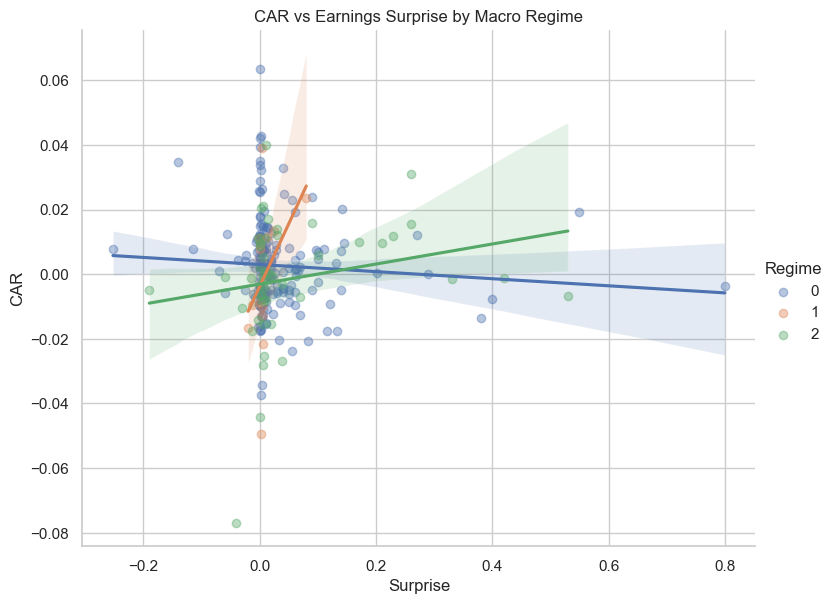

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    data=df,
    x="Surprise",
    y="CAR",
    hue="Regime",
    height=6,
    aspect=1.3,
    scatter_kws={"alpha":0.4}
)

plt.title("CAR vs Earnings Surprise by Macro Regime")
plt.show()

In [14]:
import statsmodels.formula.api as smf

# Clean interaction-only specification
formula = "CAR ~ Surprise * C(Regime)"

print("Formula:", formula)

model = smf.ols(
    formula=formula,
    data=df
).fit(cov_type="HC3")   # robust SEs

print(model.summary())

Formula: CAR ~ Surprise * C(Regime)
                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.508
Date:                Sun, 15 Feb 2026   Prob (F-statistic):              0.188
Time:                        13:54:22   Log-Likelihood:                 688.34
No. Observations:                 248   AIC:                            -1365.
Df Residuals:                     242   BIC:                            -1344.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------